## Машинное обучение, ФКН ВШЭ

## Практическое задание 3

### Общая информация
Дата выдачи: 22.09.2018

Мягкий дедлайн: 7:59MSK 02.10.2018

Жесткий дедлайн: 23:59MSK 03.10.2018

### О задании

Задание состоит из двух частей: в **первой** части вы научитесь применять готовые модели из `sklearn` на данных и исследуете особенности разных видов регуляризации; во **второй** части вы реализуете собственный класс линейной регрессии для нестандартной функции потерь (включая процесс обучения) и исследуете скорость сходимости различных градиентных методов для этой модели.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Присылать необходимо ноутбук с выполненным заданием. Часть задания сдаётся в Яндекс.Контест. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

In [40]:
import pandas as pd

In [27]:
df=pd.read_csv('./data/homework-practice-03-data.csv')

## Линейная регрессия из коробки

#### 1. [0.5 балла] Разбейте выборку, загруженную в ячейке выше в переменную `df`, на обучающую и тестовую части в соотношении 8:2.

In [28]:
from sklearn.model_selection import train_test_split

y = df['f1']
df = df.drop(columns=['f1'])
x_train, x_test, y_train, y_test = train_test_split(df, y, train_size=0.8)

C:\Users\Ekaterina\Anaconda3\envs\tens\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### 2. [0.5 балла] В качестве целевой переменной для задачи регрессии будем использовать значения признака f1. Обучите, а затем провалидируйте на тестовых данных  следующие модели, используя в качестве метрики качества $R^2$:
* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) (линейная регрессия с $L1$-регуляризатором) с коэффициентом регуляризации, равным 0.01.

Не забудьте отмасштабировать данные перед обучением моделей!

In [29]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_minmax = scaler.transform(x_train)
x_test_minmax = scaler.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_minmax, y_train)
print('Linear regression R2 score: ', lr.score(x_test_minmax, y_test))

lr_with_l1reg = Lasso(alpha=0.01)
lr_with_l1reg.fit(x_train_minmax, y_train)
print('Lasso R2 score: ', lr_with_l1reg.score(x_test_minmax, y_test))

Linear regression R2 score:  0.2855824460353089
Lasso R2 score:  0.34328118970089283


#### 3. [1 балл] Изучите значения параметров получившихся моделей и сравните количество строго нулевых весов в них.

In [30]:
print('Linear regression coefs: ', lr.coef_)
print('Lasso coefs: ', lr_with_l1reg.coef_)
print()
print('Linear regression num of zerro coefs: ', (lr.coef_ == 0).sum())
print('Lasso num of zerro coefs: ', (lr_with_l1reg.coef_ == 0).sum())

Linear regression coefs:  [ 4.68810588 -0.09060678  0.36555092  0.28209697  1.27201317  0.18483635]
Lasso coefs:  [ 4.50161721 -0.          0.08360425  0.16388906  0.63255096  0.        ]

Linear regression num of zerro coefs:  0
Lasso num of zerro coefs:  2


#### 4. [1 балл] Нарисуйте попарные scatter plot для всех признаков в исходных данных (включая f1). Можно ли что-то сказать о связи признаков, веса которых были занулены методом Lasso, с целевой переменной?

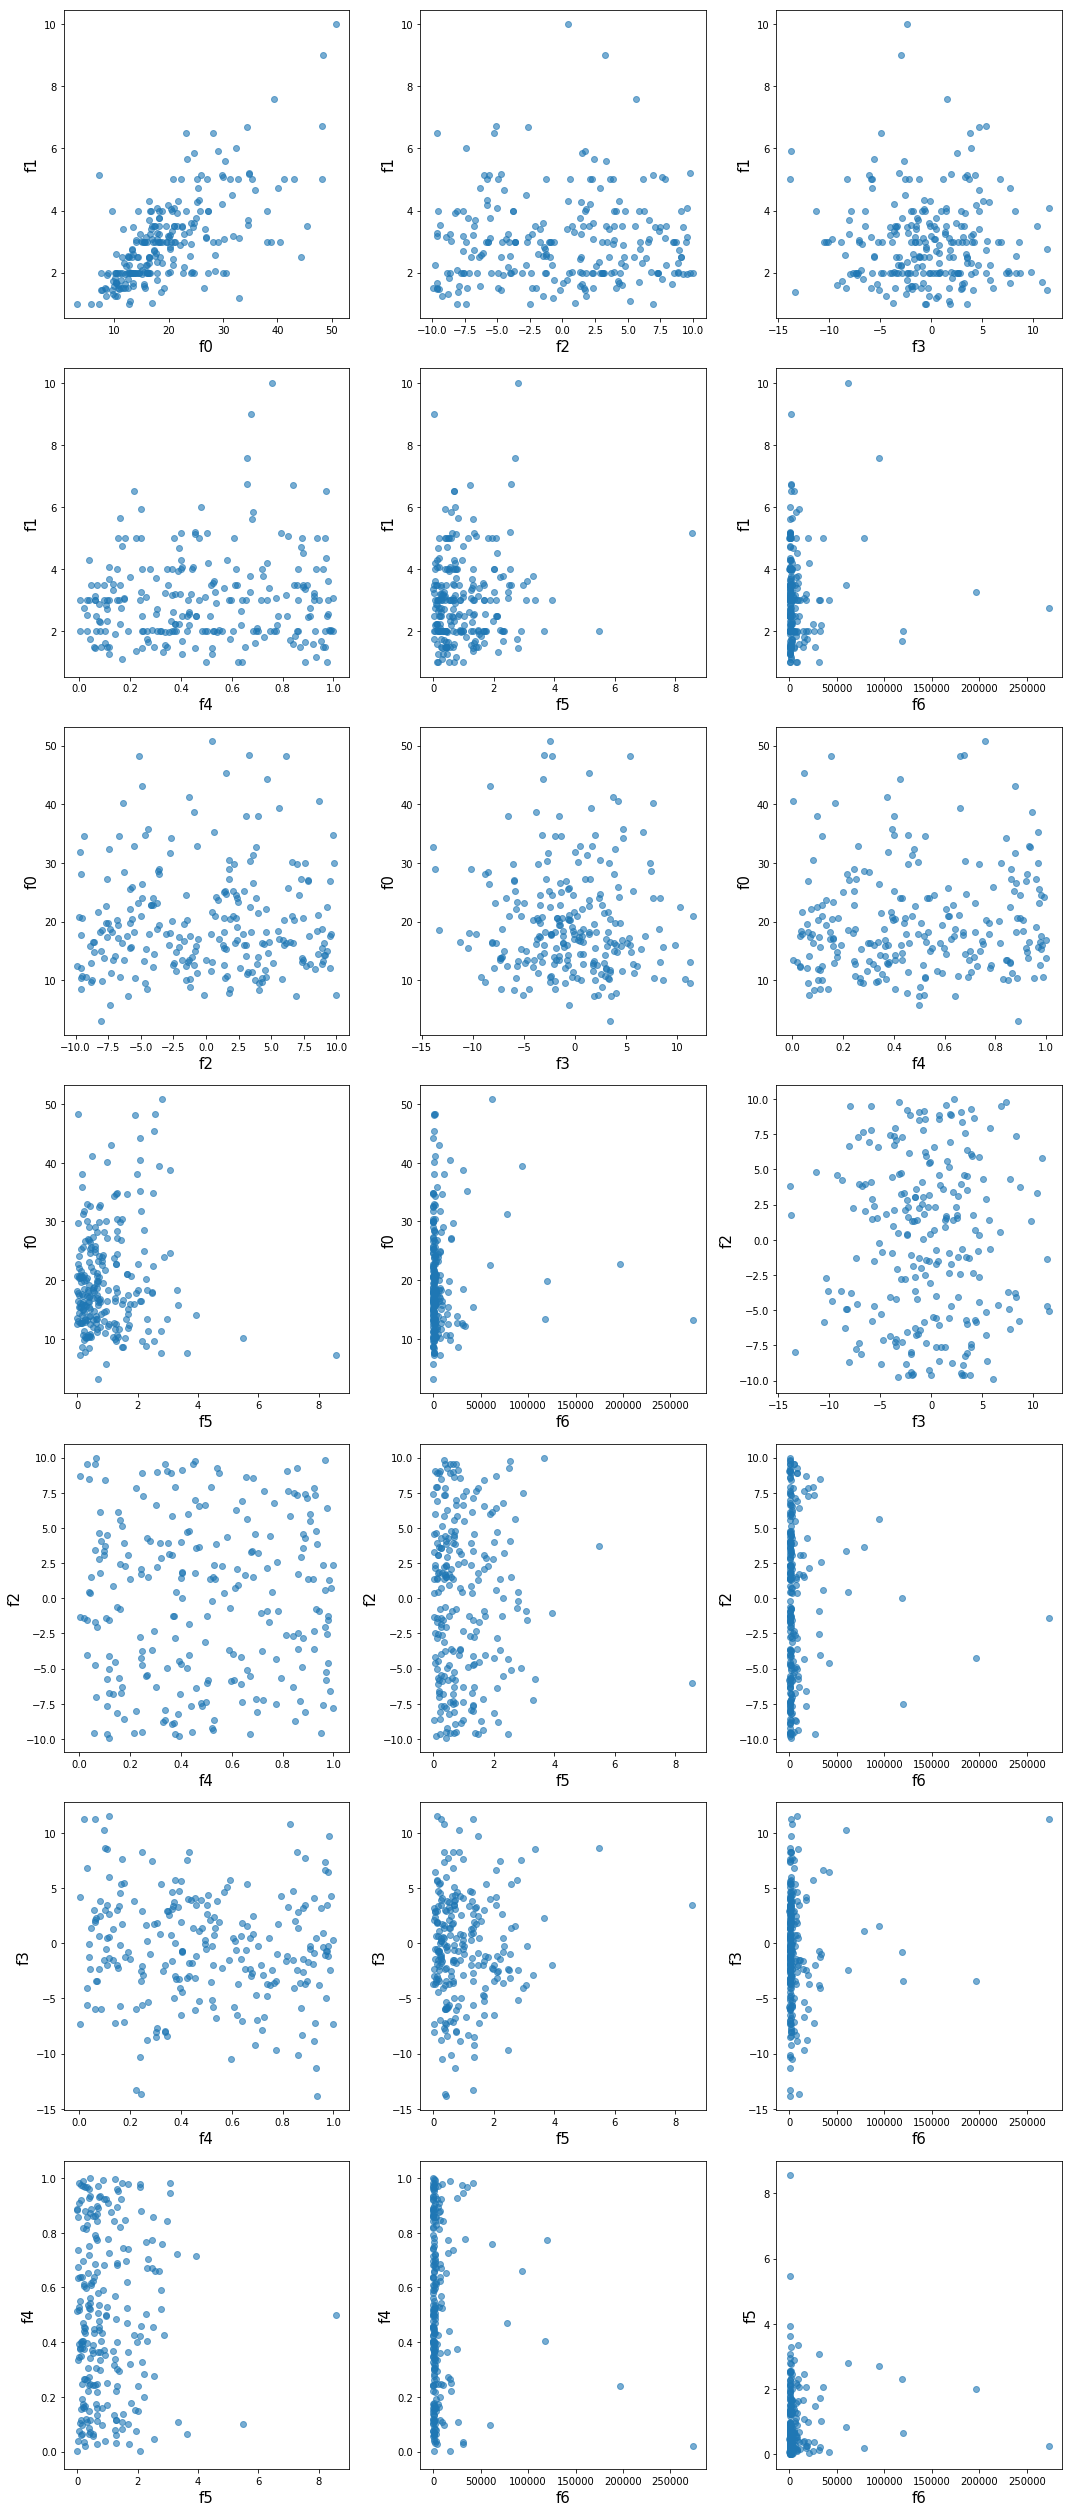

In [38]:
import matplotlib.pyplot as plt

n = 3
m = 7
k = 1

plt.figure(figsize=(n * 5, m * 5))

for i, feature in enumerate(df.columns):
    plt.subplot(m, n, k)
    plt.scatter(df[feature], y, marker='o', alpha=.6)
    plt.xlabel(feature, fontsize=15)
    plt.ylabel('f1', fontsize=15)
    k += 1
    
for i, feature_i in enumerate(df.columns[:-1]):
    for j, feature_j in enumerate(df.columns[i+1:]):
        plt.subplot(m, n, k)
        plt.scatter(df[feature_j], df[feature_i], marker='o', alpha=.6)
        plt.xlabel(feature_j, fontsize=15)
        plt.ylabel(feature_i, fontsize=15)
        k += 1

plt.tight_layout()

Признак f2 на примерно одинаковых значениях f1 может принимать всевозможные значения, например, при f1 около 2. Признак f6 практически везде равен 0.

## Реализация градиентного спуска

#### 5. [4 балла] Реализуйте модель линейной регрессии для функции потерь Huber loss, обучаемую градиентным спуском:

$$
L_\delta(a,y)=
\begin{cases}
 \frac{1}{2}(y - a)^2,                   & |y - a| \le \delta, \\
 \delta\, |y - a| - \frac{1}{2}\delta^2 & \textrm{иначе.}
\end{cases}
$$

Все вычисления должны быть векторизованы, циклы средствами python допускается использовать только для итераций градиентного спуска. В качестве критерия останова необходимо использовать (одновременно):

* проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, задаваемого параметром `tolerance`);
* достижение максимального числа итераций (например, 10000, задаваемого параметром `max_iter`).

Необходимо реализовать метод полного и стохастического градиентных спусков, а также поддержать метод momentum при помощи параметра `alpha` (способ оценивания градиента должен задаваться при помощи параметра `gd_type`).

Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса `loss_history` — в нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту).

Инициализировать веса можно случайным образом или нулевым вектором. Ниже приведён шаблон класса, который должен содержать код реализации модели.

__Python-файл с реализованным классом необходимо сдать на проверку в [Яндекс.Контест](https://contest.yandex.ru/contest/9247/)__

Укажите ссылку на посылку (run-report): https://contest.yandex.ru/contest/9247/run-report/15083790/

In [121]:
from sklearn.base import BaseEstimator
import numpy as np
import random

class HuberReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='stochastic', 
                 tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3, eta=1e-2):
        """
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        if self.w0 is None:
            self.w = np.zeros(X.shape[1])
        else:
            self.w = self.w0.copy()
        num_it = 0
        delta_w = self.tolerance + 1
        h = 0
        gradient = 0
        
        while num_it < self.max_iter or delta_w > self.tolerance:
            if self.gd_type == 'full':
                self.loss_history.append(self.calc_loss(X, y))
                gradient = self.calc_gradient(X, y)
            if self.gd_type == 'stochastic':
                ind = random.randint(0, X.shape[0] - 1)
                x_iter = np.array([X[ind]])
                y_iter = np.array([y[ind]])
                self.loss_history.append(self.calc_loss(x_iter, y_iter))
                gradient = self.calc_gradient(x_iter, y_iter)
            h = self.alpha * h - self.eta * gradient
            self.w = self.w + h
            delta_w = (h ** 2).sum()
            num_it += 1

        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        y_pred = np.dot(X, self.w)
        return y_pred
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        y_pred = self.predict(X)
        d = y - y_pred
        indexes = np.abs(d) > self.delta
        d[indexes] = -np.sign(d[indexes]) * self.delta
        indexes = np.logical_not(indexes)
        d[indexes] = -d[indexes]
        gradient = np.dot(d, X) / d.size
        return gradient

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """
        y_pred = self.predict(X)
        l = np.abs(y - y_pred)
        indexes = l > self.delta
        l[indexes] = l[indexes] * self.delta - 0.5 * self.delta ** 2
        indexes = np.logical_not(indexes)
        l[indexes] = 0.5 * l[indexes] ** 2
        loss = l.mean()
        return loss

#### 6. [1.5 балла] Обучите и провалидируйте модель на тех же данных, сравните качество с предыдущими методами. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Согласуется ли оно с вашими ожиданиями?

In [94]:
x_train_minmax = np.hstack((np.ones((x_train_minmax.shape[0], 1)), x_train_minmax))
x_test_minmax = np.hstack((np.ones((x_test_minmax.shape[0], 1)), x_test_minmax))

In [122]:
from sklearn.metrics import r2_score

num_iter = np.logspace(2, 6, 5)
r2_num_iter = []
for i in num_iter:
    model = HuberReg(gd_type='full', max_iter=i, alpha=0)
    model.fit(x_train_minmax, np.array(y_train))
    y_pred = model.predict(x_test_minmax)
    r2_num_iter.append(r2_score(np.array(y_test), y_pred))
r2_num_iter = np.array(r2_num_iter)

momentum = np.arange(0, 100, 5) / 100
r2_momentum = []
for i in momentum:
    model = HuberReg(gd_type='full', max_iter=1000, alpha=i)
    model.fit(x_train_minmax, np.array(y_train))
    y_pred = model.predict(x_test_minmax)
    r2_momentum.append(r2_score(np.array(y_test), y_pred))
r2_momentum = np.array(r2_momentum)

In [123]:
r2_num_iter_st = []
for i in num_iter:
    model = HuberReg(gd_type='stochastic', max_iter=i, alpha=0)
    model.fit(x_train_minmax, np.array(y_train))
    y_pred = model.predict(x_test_minmax)
    r2_num_iter_st.append(r2_score(np.array(y_test), y_pred))
r2_num_iter_st = np.array(r2_num_iter_st)

r2_momentum_st = []
for i in momentum:
    model = HuberReg(gd_type='stochastic', max_iter=1000, alpha=i)
    model.fit(x_train_minmax, np.array(y_train))
    y_pred = model.predict(x_test_minmax)
    r2_momentum_st.append(r2_score(np.array(y_test), y_pred))
r2_momentum_st = np.array(r2_momentum_st)

Max R2-score
Full GD, momentum = 0:  0.321292536770289
SGD, momentum = 0:  0.32108705015280514
Full GD, max_iter = 1000:  0.32112022861780243
SGD, max_iter = 1000:  0.31059515897606815


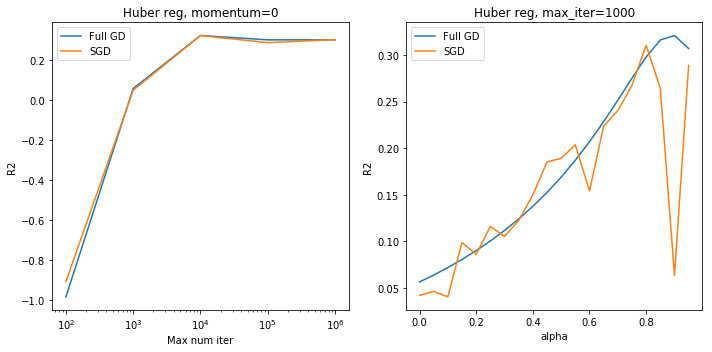

In [128]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.semilogx(num_iter, r2_num_iter, label='Full GD')
plt.semilogx(num_iter, r2_num_iter_st, label='SGD')
plt.xlabel('Max num iter')
plt.ylabel('R2')
plt.title('Huber reg, momentum=0')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(momentum, r2_momentum, label='Full GD')
plt.plot(momentum, r2_momentum_st, label='SGD')
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title('Huber reg, max_iter=1000')
plt.legend()

plt.tight_layout()

print('Max R2-score')
print('Full GD, momentum = 0: ', r2_num_iter.max())
print('SGD, momentum = 0: ', r2_num_iter_st.max())
print('Full GD, max_iter = 1000: ', r2_momentum.max())
print('SGD, max_iter = 1000: ', r2_momentum_st.max())

При росте максимального числа с 100 до 10000 итераций R2 растёт, то есть модель успевает сойтись. После 10000 R2 начинает убывать, модель немного переобучается.
При увеличении параметра alpha до 0.8 R2 растёт для GB и SGB.

#### 7. [1.5 балла] Постройте графики (на одной и той же картинке) зависимости величины функции потерь от номера итерации для полного, стохастического градиентного спусков, а также для полного градиентного спуска с методом инерции. Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.

Не забывайте о том, что должны из себя представлять *красивые* графики!

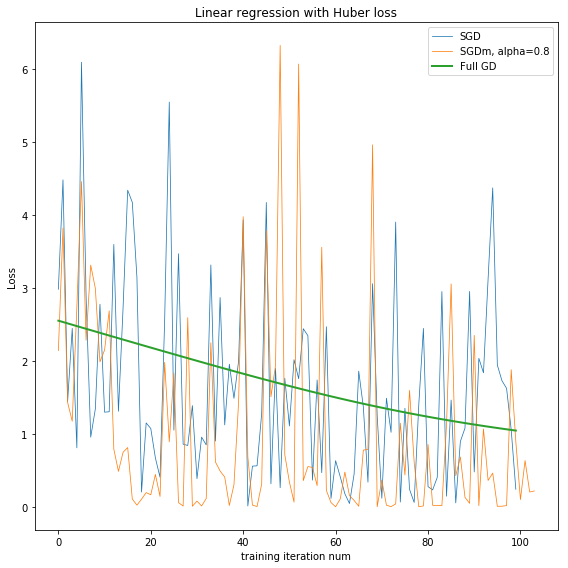

In [127]:
model = HuberReg(gd_type='full', max_iter=100, alpha=0)
model.fit(x_train_minmax, np.array(y_train))
history_full = np.array(model.loss_history)
model = HuberReg(gd_type='stochastic', max_iter=100, alpha=0)
model.fit(x_train_minmax, np.array(y_train))
history_stochastic = np.array(model.loss_history)
model = HuberReg(gd_type='stochastic', max_iter=100, alpha=0.8)
model.fit(x_train_minmax, np.array(y_train))
history_stochastic_m = np.array(model.loss_history)

plt.figure(figsize=(8, 8))

plt.plot(np.arange(history_stochastic.size), history_stochastic, label='SGD', linewidth=0.75)
plt.plot(np.arange(history_stochastic_m.size), history_stochastic_m, label='SGDm, alpha=0.8', linewidth=0.75)
plt.plot(np.arange(history_full.size), history_full, label='Full GD', linewidth=2)
plt.xlabel('training iteration num')
plt.ylabel('Loss')
plt.title('Linear regression with Huber loss')
plt.legend()

plt.tight_layout()

Полный градиентый спуск сходится медленно и монотонно, но не достигает таких маленьких значений, как стохастический. Стохастические методы сходятся скачками и уже к 20 итерации достигают минимальных значений функции потерь.